In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 16 20:38:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import argparse
import os
import random

import numpy as np
import numpy.matlib

import matplotlib.pyplot as plt
import pickle

## Dataset overview

In this problem we are building 15-way multi-class classifiers for a fruit classification task. The training and validation sets are stored in the .pkl files provided. See the hw5.pdf file we have provided for details.

In each dataset, we provide the following:
- 'images': the raw RGB images
- 'feats': 15 dimensional condensed representations of each image (that were precomputed by using a pretrained vision transformer + PCA)
- 'labels': an integer value between 0 and 14. The integer to class mapping is provided below in the variable 'idx_to_class'.

We first create a simple python dictionary that maps integers to textual class labels that can be useful for debugging.

In [6]:
idx_to_class = {0: 'Apple', 1: 'Banana', 2: 'Carambola', 3: 'Guava', 4: 'Kiwi', 5: 'Mango', 6: 'Orange', 7: 'Peach', 8: 'Pear', 9: 'Persimmon', 10: 'Pitaya', 11: 'Plum', 12: 'Pomegranate', 13: 'Tomatoes', 14: 'Muskmelon'}
print(idx_to_class)

{0: 'Apple', 1: 'Banana', 2: 'Carambola', 3: 'Guava', 4: 'Kiwi', 5: 'Mango', 6: 'Orange', 7: 'Peach', 8: 'Pear', 9: 'Persimmon', 10: 'Pitaya', 11: 'Plum', 12: 'Pomegranate', 13: 'Tomatoes', 14: 'Muskmelon'}


Next, we load the .pkl files that load as python dictionaries.

In [ ]:
!unzip /content/drive/MyDrive/datasets_ee511/datasets.zip

Archive:  /content/drive/MyDrive/datasets_ee511/datasets.zip
   creating: datasets/
  inflating: datasets/train.pkl      
  inflating: datasets/val.pkl        


In [7]:
with open('/content/drive/MyDrive/datasets/datasets/train.pkl', 'rb') as f:
    train_dataset = pickle.load(f)

In [8]:
with open('/content/drive/MyDrive/datasets/datasets/val.pkl', 'rb') as f:
    val_dataset = pickle.load(f)

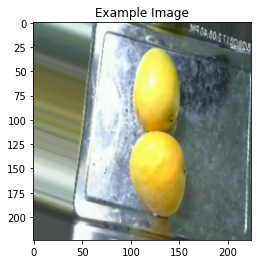

In [9]:
# We can plot the images this way. This will be quite useful for debugging.
plt.figure()
plt.title('Example Image')
plt.imshow(train_dataset['images'][0])
plt.show()

In [10]:
print("Examples Features shape:", train_dataset['feats'][0].shape)

Examples Features shape: (15,)


In [11]:
print("Example image label:", idx_to_class[train_dataset['labels'][0]])

Example image label: Mango


## Part 2(b): Random Forest/GBDT 

Implement a random forest or GBDT from scratch and report your classifier's accuracy on the training and validation sets. **You should use your implementation from prior homeworks and turn it in again with updates, if any.**

In [12]:
# TODO: Implement a random forest/gbdt
class TreeEnsemble:
    def __init__():
        pass
    def fit(X, y):
        pass
    def predict(X):
        pass

In [13]:
import numpy as np
#from numba import jit
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pdb import set_trace as bp

In [14]:
#TODO: loss of least square regression and binary logistic regression
'''
    pred() takes GBDT/RF outputs, i.e., the "score", as its inputs, and returns predictions.
    g() is the gradient/1st order derivative, which takes true values "true" and scores as input, and returns gradient.
    h() is the heassian/2nd order derivative, which takes true values "true" and scores as input, and returns hessian.
'''
class leastsquare(object):
    '''Loss class for mse. As for mse, pred function is pred=score.'''
    def pred(self,score):
        return score

    def g(self,true,score):
        return -2*(true - score)

    def h(self,true,score):
        return 2*np.ones_like(true)

class logistic(object):
    '''Loss class for log loss. As for log loss, pred function is logistic transformation.'''
    def pred(self,score):
        return np.round(1 / (1 + np.exp(-np.array(score))))

    def g(self,true,score):
        return -((true-1)*np.exp(score)+true) / (np.exp(score)+1)

    def h(self,true,score):
        return np.exp(score) / ((np.exp(score)+1)**2)

In [15]:
# TODO: class of Random Forest
class RF(object):
    '''
    Class of Random Forest
    
    Parameters:
        n_threads: The number of threads used for fitting and predicting.
        loss: Loss function for gradient boosting.
            'mse' for regression task and 'log' for classfication task.
            A child class of the loss class could be passed to implement customized loss.
        max_depth: The maximum depth d_max of a tree.
        min_sample_split: The minimum number of samples required to further split a node.
        lamda: The regularization coefficient for leaf score, also known as lambda.
        gamma: The regularization coefficient for number of tree nodes, also know as gamma.
        rf: rf*m is the size of random subset of features, from which we select the best decision rule.
        num_trees: Number of trees.
    '''
    def __init__(self,
        n_threads = None, loss = 'mse', max_depth = 3, min_sample_split = 10, lamda = 1, gamma = 0, rf = 0.99, num_trees = 100, gradient_seed = 'zeros'):
        
        self.n_threads = n_threads
        self.loss = loss
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.lamda = lamda
        self.gamma = gamma
        self.rf = rf
        self.num_trees = num_trees
        self.trees_in_forest = []
        self.gradient_seed = gradient_seed
        if loss == "mse": self.loss_fn = leastsquare()
        else: self.loss_fn = logistic()

    def fit(self, train, target):
        # train is n x m 2d numpy array
        # target is n-dim 1d array
        #TODO
        n,m = train.shape
        for _ in range(self.num_trees):
            indices = np.random.choice(np.arange(n), n, replace=True)
            train_bt = train[indices, :]
            target_bt = target[indices]
            tree = Tree(n_threads=self.n_threads, max_depth=self.max_depth, min_sample_split=self.min_sample_split, rf=self.rf,
                 lamda=self.lamda, gamma=self.gamma, )

            if self.gradient_seed == 'zeros': y_0_hat = np.zeros((n,))
            elif self.gradient_seed == 'mean': y_0_hat = np.ones((n,)) * target.mean()

            gradients = self.loss_fn.g(target_bt, y_0_hat)
            hessians = self.loss_fn.h(target_bt, y_0_hat)
            tree.fit(train_bt, gradients, hessians)

            self.trees_in_forest.append(tree)
        return self

    def predict(self, test):
        #TODO
        preds_from_trees = []
        for tree in self.trees_in_forest:
            score = tree.predict(test)
            preds_from_trees.append(self.loss_fn.pred(score))
        preds_from_trees = np.array(preds_from_trees)
        if self.loss == 'mse':
            return np.mean(np.array(preds_from_trees), axis=0)
        else:
            return (preds_from_trees.sum(axis=0) > (self.num_trees//2)).astype('int') # majority vote
     #   return self.loss.pred(score)

In [16]:
#TODO: class of GBDT
class GBDT(object):
    '''
    Class of gradient boosting decision tree (GBDT)
    
    Parameters:
        n_threads: The number of threads used for fitting and predicting.
        loss: Loss function for gradient boosting.
            'mse' for regression task and 'log' for classfication task.
            A child class of the loss class could be passed to implement customized loss.
        max_depth: The maximum depth D_max of a tree.
        min_sample_split: The minimum number of samples required to further split a node.
        lamda: The regularization coefficient for leaf score, also known as lambda.
        gamma: The regularization coefficient for number of tree nodes, also know as gamma.
        learning_rate: The learning rate eta of GBDT.
        num_trees: Number of trees.
    '''
    def __init__(self,
        n_threads = None, loss = 'mse',
        max_depth = 3, min_sample_split = 10, 
        lamda = 1, gamma = 0,
        learning_rate = 0.1, num_trees = 100):
        
        self.n_threads = n_threads
        self.loss = loss
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.lamda = lamda
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.num_trees = num_trees
        self.trees = []
        if loss == "mse": self.loss_fn = leastsquare()
        else: self.loss_fn = logistic()

    def fit(self, train, target, bootstrap = True):
        # train is n x m 2d numpy array
        # target is n-dim 1d array
        #TODO
        n,m = train.shape
        self.y_train_mean = target.mean()
        y_hat = np.ones(n) * target.mean()
        for _ in range(self.num_trees):

            indices = np.random.choice(np.arange(n), n, replace=True)
            train_bt = train[indices, :]
            target_bt = target[indices]
            tree = Tree(n_threads=self.n_threads, max_depth=self.max_depth, min_sample_split=self.min_sample_split, rf=1,
                 lamda=self.lamda, gamma=self.gamma, )

            gradients = self.loss_fn.g(target_bt, y_hat)
            hessians = self.loss_fn.h(target_bt, y_hat)
            tree.fit(train_bt, gradients, hessians)
            self.trees.append(tree)
            y_hat = y_hat + self.learning_rate * self.predict(train)
        return self

    def predict(self, test):
        #TODO
        n,m = test.shape
        preds = np.zeros((n, self.num_trees))
        y_hat_0 = np.ones(n) * self.y_train_mean
        preds[:,0] = y_hat_0 + self.learning_rate * np.array(self.trees[0].predict(test))
        for tree_idx in np.arange(1, len(self.trees)):
            tree = self.trees[tree_idx]
            score = np.array(tree.predict(test))
            preds[:, tree_idx] = preds[:, tree_idx-1] + self.learning_rate * score

        return self.loss_fn.pred(preds.mean(axis=1))

In [17]:
# TODO: class of a node on a tree
class TreeNode(object):
    '''
    Data structure that are used for storing a node on a tree.
    
    A tree is presented by a set of nested TreeNodes,
    with one TreeNode pointing two child TreeNodes,
    until a tree leaf is reached.
    
    A node on a tree can be either a leaf node or a non-leaf node.
    '''
    
    #TODO
    def __init__(self, split_feature=None, split_threshold=None, left_child=None, right_child=None, gain=None, weight= None):
        self.split_feature = split_feature
        self.split_threshold = split_threshold
        self.left_child = left_child
        self.right_child = right_child
        self.gain = gain
        self.weight = weight 
        

In [18]:
# TODO: class of single tree
class Tree(object):
    '''
    Class of a single decision tree in GBDT

    Parameters:
        n_threads: The number of threads used for fitting and predicting.
        max_depth: The maximum depth of the tree.
        min_sample_split: The minimum number of samples required to further split a node.
        lamda: The regularization coefficient for leaf prediction, also known as lambda.
        gamma: The regularization coefficient for number of TreeNode, also know as gamma.
        rf: rf*m is the size of random subset of features, from which we select the best decision rule,
            rf = 0 means we are training a GBDT.
    '''
    
    def __init__(self, n_threads = None, 
                 max_depth = 3, min_sample_split = 10,
                 lamda = 1, gamma = 0, rf = 0):
        self.n_threads = n_threads
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.lamda = lamda
        self.gamma = gamma
        self.rf = 0
        self.int_member = 0

    def fit(self, train, g, h):
        '''
        train is the training data matrix, and must be numpy array (an n_train x m matrix).
        g and h are gradient and hessian respectively.
        '''
        #TODO
        #self.root = self.construct_tree(train, g, h)
        self.root = self.construct_tree(train, g, h)

        #return self

    def predict(self,test):
        '''
        test is the test data matrix, and must be numpy arrays (an n_test x m matrix).
        Return predictions (scores) as an array.
        '''
        #TODO
        preds = [self.make_prediction(x, self.root) for x in test]
        return preds
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        if tree.weight != None: return tree.weight
        feature_val = x[tree.split_feature]
        if feature_val <= tree.split_threshold:
            return self.make_prediction(x, tree.left_child)
        else:
            return self.make_prediction(x, tree.right_child) 

    def construct_tree(self, train, g, h, curr_depth = 0):
        '''
        Tree construction, which is recursively used to grow a tree.
        First we should check if we should stop further splitting.
        
        The stopping conditions include:
            1. tree reaches max_depth $d_{max}$
            2. The number of sample points at current node is less than min_sample_split, i.e., $n_{min}$
            3. gain <= 0
        '''
        #TODO
        n, m = train.shape
        if n >= self.min_sample_split and self.max_depth >= curr_depth:
            best_feature_idx, best_threshold, gain, dataset_left, dataset_right, g_l, g_r, h_l, h_r = self.find_best_decision_rule(train, g, h)
            if gain > 0:
                left_subtree = self.construct_tree(dataset_left, g_l, h_l, curr_depth+1)
                right_subtree = self.construct_tree(dataset_right, g_r, h_r, curr_depth+1)
                return TreeNode(split_feature = best_feature_idx, split_threshold = best_threshold,
                                left_child = left_subtree, right_child = right_subtree, gain = gain)

        # if we are at leaf
        weight = -np.sum(g) / (np.sum(h) + self.lamda)
        return TreeNode(weight=weight)
        
        
    def find_best_decision_rule(self, train, g, h):
        '''
        Return the best decision rule [feature, treshold], i.e., $(p_j, \tau_j)$ on a node j, 
        train is the training data assigned to node j
        g and h are the corresponding 1st and 2nd derivatives for each data point in train
        g and h should be vectors of the same length as the number of data points in train
        
        for each feature, we find the best threshold by find_threshold(),
        a [threshold, best_gain] list is returned for each feature.
        Then we select the feature with the largest best_gain,
        and return the best decision rule [feature, treshold] together with its gain.
        '''
        #TODO
        n, m = train.shape
        if self.rf:
            feat_indices = np.random.choice(np.arange(m), size=round(self.rf*m))
            train = train[:,feat_indices]

        n, m = train.shape
        best_gain = -float('inf')
        best_threshold, best_left, best_right, best_feat_idx = None, None, None, None
        best_g_l, best_g_r, best_h_l, best_h_r = None, None, None, None
        for feat_idx in range(m):
            feature_values = train[:,feat_idx]
            for cand_thresh in np.unique(feature_values):
                dataset_left, dataset_right, g_l, g_r, h_l, h_r = self.split(train, g, h, feat_idx, cand_thresh)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    G_L, H_L = np.sum(g_l), np.sum(h_l)
                    G_R, H_R = np.sum(g_r), np.sum(h_r)
                    term1 = G_L**2/(H_L + self.lamda)
                    term2 = G_R**2/(H_R + self.lamda)
                    term3 = (G_L + G_R)**2/ (H_L + H_R + self.lamda)
                    gain = 0.5*(term1 + term2 - term3) - self.gamma
                    if gain > best_gain:
                        best_gain = gain
                        best_threshold = cand_thresh
                        best_feat_idx = feat_idx
                        best_left, best_right = dataset_left, dataset_right
                        best_g_l, best_g_r, best_h_l, best_h_r = g_l, g_r, h_l, h_r

        return best_feat_idx, best_threshold, best_gain, best_left, best_right, best_g_l, best_g_r, best_h_l, best_h_r
        #return feature, threshold, gain
    
    #def find_threshold(self, g, h, train):
     #   '''
      #  Given a particular feature $p_j$,
       # return the best split threshold $\tau_j$ together with the gain that is achieved.
       # '''
        #TODO               
        #return [threshold, best_gain]
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        if not tree: tree = self.root
        if tree.weight is not None:
            print(tree.weight)
        else:
            print("X_"+str(tree.split_feature), "<=", tree.split_threshold, "?", tree.gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left_child, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right_child, indent + indent)

    def split(self, train, g, h, best_feature_idx, best_threshold):
        n = train.shape[0]
        left_mask = np.arange(n)[train[:,best_feature_idx] <= best_threshold]
        right_mask = np.arange(n)[train[:,best_feature_idx] > best_threshold]
        return train[left_mask], train[right_mask], g[left_mask], g[right_mask], h[left_mask], h[right_mask]        

In [19]:
# TODO: Evaluation functions (you can use code from previous homeworks)

# RMSE
def root_mean_square_error(pred, y):
    #TODO
    return np.sqrt(np.mean((pred-y)**2))

# precision
def accuracy(pred, y):
    #TODO
    return (pred == y).sum() / len(y)

In [20]:
#this was used in previous homework, but here xtrain and xval is different for classification

# TODO: GBDT classification on breast cancer dataset

# load data
#from sklearn import datasets
#breast_cancer = datasets.load_breast_cancer()
#X = breast_cancer.data
#y = breast_cancer.target

# train-test split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [21]:
X_train = np.array(train_dataset['feats'])
y_train = np.array(train_dataset['labels'])

X_val = np.array(val_dataset['feats'])
y_val = np.array(val_dataset['labels'])

In [24]:
rf = RF(loss='log', gradient_seed="zeros", max_depth = 20, num_trees = 20)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
train_acc_RF_zeros = accuracy(train_pred, y_train)
print("Train accuracy using Random Forest, zeros gradient-seed: ", train_acc_RF_zeros)
val_pred = rf.predict(X_val)
val_acc_RF_zeros = accuracy(val_pred, y_val)
print("Test accuracy using Random Forest, zeros gradient-seed: ", val_acc_RF_zeros)

Train accuracy using Random Forest, zeros gradient-seed:  0.19309437019036046
Test accuracy using Random Forest, zeros gradient-seed:  0.1781663516068053


In [26]:
rf = RF(loss='log', gradient_seed="zeros", max_depth = 30, num_trees = 30)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
train_acc_RF_zeros = accuracy(train_pred, y_train)
print("Train accuracy using Random Forest, zeros gradient-seed: ", train_acc_RF_zeros)
val_pred = rf.predict(X_val)
val_acc_RF_zeros = accuracy(val_pred, y_val)
print("Test accuracy using Random Forest, zeros gradient-seed: ", val_acc_RF_zeros)

Train accuracy using Random Forest, zeros gradient-seed:  0.19603078169299312
Test accuracy using Random Forest, zeros gradient-seed:  0.17485822306238186


In [ ]:
gbdt = GBDT(num_trees=20, gamma=1, min_sample_split=31, max_depth=20, loss="log")
gbdt.fit(X_train, y_train)
train_pred = gbdt.predict(X_train)
train_acc_GBDT = accuracy(train_pred, y_train)
print("Train accuracy using GBDT: ", train_acc_GBDT)
val_pred = gbdt.predict(X_val)
val_acc_GBDT = accuracy(val_pred, y_val)
print("Test accuracy using GBDT: ", val_acc_GBDT)

Train accuracy using GBDT:  0.09953422438234102
Test accuracy using GBDT:  0.09215500945179585


In [ ]:
# TODO: Report accuracy on training and validation sets

Part 2(f): Bakeoff: Choose the best Classifier
For this section, you are free to use a classifier of your choice (you are allowed to use any libraries of your choice). You are also free to use the training and validation sets in any way you choose i.e. you can merge them and perform k-fold cross validation.

To evaluate your classifier, we will on March 15th provide you with a pickle file ('test.pkl') that will be in the same format as the 'train.pkl' and 'val.pkl' but will not contain the labels. You will need to generate predictions for each of the inputs we provide in 'test.pkl' in a text file.

For your submission, you will need to provide us with a test_predictions.txt file containing the class predictions of your classifier. We will compute the accuracy of the predictions you provide for your evaluation.

In [ ]:
pred = []

# TODO: Train a classifier and generate predictions on the test set and put your predictions in pred.
# ...

# Make sure that pred contains a 1-dimensional integer array of class labels for the test set and make sure that
# every integer is in the range 0 through 14. If you have an entry in this array outside of the integer
# range of 0 through 14, it will be assumed to be an error. Also, if your array is not the length of the test
# set that will be assumed to be an error. Specifically, suppose n_mine is the length of the array of integers
# you turn in. If the test set has n_test images (meaning 
# it is an n_test X m matrix), then if your array is less than n_test long (so n_mine < n_test, then any missing 
# images will be assumed to be an error, so there will be n_test - n_mine errors. If your array is longer than 
# n_test images long, so that n_mine > n_test, then we will take the final n_mine - n_test images, whatever
# your predictions are for those images, and assume that those n_mine - n_test images are in error. Bottom line:
# make sure your array is exactly the right length, meaning you should have n_mine == n_test. Meaning,
# the array pred should be a one-dimensional integer array with integers in the 0-14 range
# of length n_mine. You can make sure that pred is of integer type by doing `pred = pred.astype(np.int32)` but
# after you do this, make sure to examine the result to ensure that they are integers in the right range.
#
# Note that the saved text file should have one prediction per ASCII line (this can be done by ensuring that pred 
# is of shape (n_test,) and then simply using np.savetxt).
np.savetxt('test_predictions.txt', pred)
